In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.6 kB/s 
     |████████████████████████████████| 1.6 MB 49.1 MB/s 
     |████████████████████████████████| 438 kB 72.2 MB/s 
     |████████████████████████████████| 5.8 MB 51.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [10]:
x= pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train.shape,y_train.shape

((8000, 11), (8000,))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [66]:
model = Sequential()
model.add(Dense(11,activation='leaky_relu',input_dim=11))
model.add(BatchNormalization())
model.add(Dense(21,activation= 'leaky_relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1,activation= 'sigmoid'))

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 11)                132       
                                                                 
 batch_normalization_11 (Bat  (None, 11)               44        
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 21)                252       
                                                                 
 dropout_9 (Dropout)         (None, 21)                0         
                                                                 
 batch_normalization_12 (Bat  (None, 21)               84        
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 1)                

In [68]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [69]:

earlystopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [70]:
model_history= model.fit(x_train,y_train,validation_split=0.3,batch_size=10,epochs=300,callbacks=earlystopping)

Epoch 1/300
560/560 [==============================] - 3s 4ms/step - loss: 0.4840 - accuracy: 0.7823 - val_loss: 0.4309 - val_accuracy: 0.8117
Epoch 2/300
560/560 [==============================] - 2s 4ms/step - loss: 0.4694 - accuracy: 0.7934 - val_loss: 0.4306 - val_accuracy: 0.8017
Epoch 3/300
560/560 [==============================] - 2s 4ms/step - loss: 0.4575 - accuracy: 0.8014 - val_loss: 0.4150 - val_accuracy: 0.8158
Epoch 4/300
560/560 [==============================] - 2s 4ms/step - loss: 0.4625 - accuracy: 0.7970 - val_loss: 0.5086 - val_accuracy: 0.7513
Epoch 5/300
560/560 [==============================] - 2s 4ms/step - loss: 0.4323 - accuracy: 0.8121 - val_loss: 0.4397 - val_accuracy: 0.8025
Epoch 6/300
560/560 [==============================] - 2s 4ms/step - loss: 0.4420 - accuracy: 0.8086 - val_loss: 0.4008 - val_accuracy: 0.8379
Epoch 7/300
560/560 [==============================] - 2s 4ms/step - loss: 0.4352 - accuracy: 0.8127 - val_loss: 0.3994 - val_accuracy: 0.8317

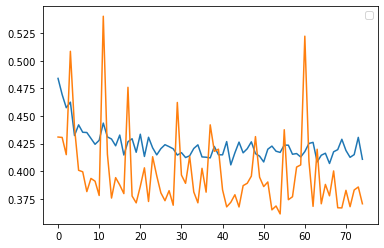

In [71]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend()
plt.show()

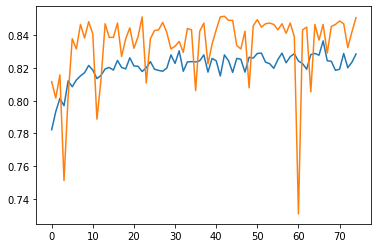

In [72]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

In [73]:
y_log=model.predict(x_test)
y_pred = np.where(y_log >0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

63/63 [==============================] - 0s 2ms/step


0.857

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8655

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.811

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.8675

In [77]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.863